# Impact-T fieldmap reconstruction

In [11]:
from impact import Impact, fieldmaps
import numpy as np

In [2]:
ifile = '../templates/lcls_injector/ImpactT.in'
I = Impact(input_file=ifile)

/Users/chrisonian/Code/GitHub/lume-impact/templates/lcls_injector
Configured for tempdir: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/temp_impactT_xsy_xtaf


In [3]:
# Fieldmaps are stored here
I.input['fieldmaps'].keys()

dict_keys(['rfdata201', 'rfdata7', 'rfdata102', 'rfdata5', 'rfdata6', 'rfdata4'])

In [4]:
# Look at a solrf element
I.ele['solrf_2']

{'description': '',
 'original': '0.49308 10 20 105 0.0 0.0 0.0 0.0 102.0 0.15 0.0 0.0 0.0 0.0 0.0 0.2430 /  ',
 'L': 0.49308,
 'itype': 105,
 'type': 'solrf',
 'zedge': 0.0,
 'rf_field_scale': 0.0,
 'rf_frequency': 0.0,
 'theta0_deg': 0.0,
 'filename': 'rfdata102',
 'radius': 0.15,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0.243,
 's': 0.49308,
 'name': 'solrf_2'}

In [5]:
I.ele['solrf_2']['filename']

'rfdata102'

In [6]:
# This will process the fieldmap to extract Ez and Bz
rdfata = I.input['fieldmaps']['rfdata102']
fmap = fieldmaps.process_fieldmap_solrf(rdfata)
fmap

{'Ez': {'z0': 0.0, 'z1': 0.0, 'L': 0.0, 'fourier_coefficients': array([0.])},
 'Bz': {'z0': -0.53308,
  'z1': 0.49308,
  'L': 1.02616,
  'fourier_coefficients': array([ 7.59104159e-01,  1.86860998e-01,  2.68209187e-09, -4.75732117e-01,
          5.68488796e-09, -2.63303014e-01, -2.00685489e-10,  8.31385362e-02,
         -1.07061180e-09,  3.32147505e-02,  3.34109023e-09, -4.03166145e-03,
          2.36977653e-09,  7.55695585e-02,  7.03628508e-09,  4.05472421e-02,
         -7.93679210e-09, -2.78630279e-02, -2.80674359e-08, -1.23309101e-02,
         -1.21750197e-08, -1.11917490e-03,  2.72183881e-08, -1.76941899e-02,
          2.07775590e-08, -6.82928971e-03, -4.64611502e-09,  9.04327137e-03,
         -2.74644209e-08,  3.46208848e-03,  1.22819960e-08,  4.56318358e-04,
          2.11520498e-08,  4.27450120e-03, -2.88644504e-08,  7.52482987e-04,
         -3.59752217e-08, -2.87393685e-03,  1.26542743e-08, -8.38592686e-04,
          3.01815044e-08, -1.30737597e-04, -9.86177028e-09, -1.04357300

In [8]:
fieldmaps.fieldmap_reconsruction(fmap['Bz'], 0)

0.0010391558303786685

# Basic plot

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [14]:
zlist = np.linspace(0, fmap['Bz']['L'], 1000)
fieldlist = [fieldmaps.fieldmap_reconsruction(fmap['Bz'], z) for z in zlist]

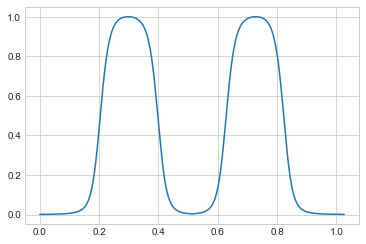

In [15]:
fig = plt.figure()
ax = plt.axes()
ax.plot(zlist, fieldlist);